In [586]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns
import statsmodels.api as sm 
from statsmodels import regression
from scipy import stats
%matplotlib inline

yf.pdr_override()

start_i = '2017-01-01'

tickers_dict =[bova11, vale3, b3sa3, itub4, petr4,
               bbdc4, petr3, abev3, mglu3, bbsa3, itsa4]

upper_bov = str(bova11).upper()
print(upper_bov)

'''bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)
vale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)
b3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)
itub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)
petr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)
bbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)
petr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)
abev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)
mglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)
bbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)
itsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)'''

OPEN        HIGH        LOW       CLOSE   ADJ CLOSE   VOLUME
DATE                                                                          
2017-01-02   57.990002   58.040001  57.500000   57.630001   57.630001   828980
2017-01-03   57.650002   59.860001  57.650002   59.750000   59.750000  3194690
2017-01-04   59.740002   60.020000  59.410000   59.750000   59.750000  1759860
2017-01-05   59.849998   60.480000  59.680000   60.049999   60.049999  1172450
2017-01-06   60.480000   60.480000  59.480000   59.849998   59.849998   848080
...                ...         ...        ...         ...         ...      ...
2020-07-21  101.230003  101.360001  99.849998  100.290001  100.290001  5261760
2020-07-22  100.570000  101.150002  99.389999  100.379997  100.379997  6524500
2020-07-23  100.379997  101.059998  98.269997   98.400002   98.400002  7849280
2020-07-24   98.300003   98.930000  97.089996   98.589996   98.589996  9457090
2020-07-27   98.930000  100.730003  98.849998  100.620003  100.620003 

"bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)\nvale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)\nb3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)\nitub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)\npetr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)\nbbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)\npetr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)\nabev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)\nmglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)\nbbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)\nitsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)"

In [570]:
bova11.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-14,95.099998,96.870003,94.620003,96.599998,96.599998,9503620
2020-07-15,97.699997,98.339996,96.930000,98.029999,98.029999,13982380
2020-07-16,97.550003,97.800003,96.459999,96.820000,96.820000,6110460
2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



In [571]:
# Creating Series:

# iShares Ibovespa (BOVA11.SA): 

date_ibov = ibov.loc[:, 'Date']
open_ibov = ibov.loc[:, 'Open']
open_ibov_0 = open_ibov[0]
open_ibov_norm = open_ibov/open_ibov_0

# Vale S.A. (VALE):

date_vale = vale.loc[:, 'Date']
open_vale = vale.loc[:, 'Open']
open_vale_0 = open_vale[0]
open_vale_norm = open_vale/open_vale_0

# Brasil, Bolsa, Balcão (B3SA3.SA):

date_b3sa = b3sa.loc[:, 'Date']
open_b3sa = b3sa.loc[:, 'Open']
open_b3sa_0 = open_b3sa[0]
open_b3sa_norm = open_b3sa/open_b3sa_0

# Itau Unibanco Holding S.A. (ITUB4.SA): 

date_itub = itub.loc[:, 'Date']
open_itub = itub.loc[:, 'Open']
open_itub_0 = open_itub[0]
open_itub_norm = open_itub/open_itub_0

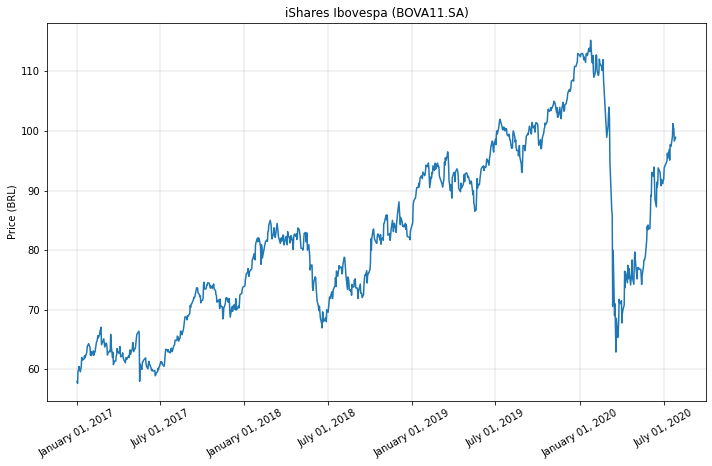

In [572]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(ibov.Date, ibov.Open, linestyle='-')

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.grid(linewidth=0.10)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

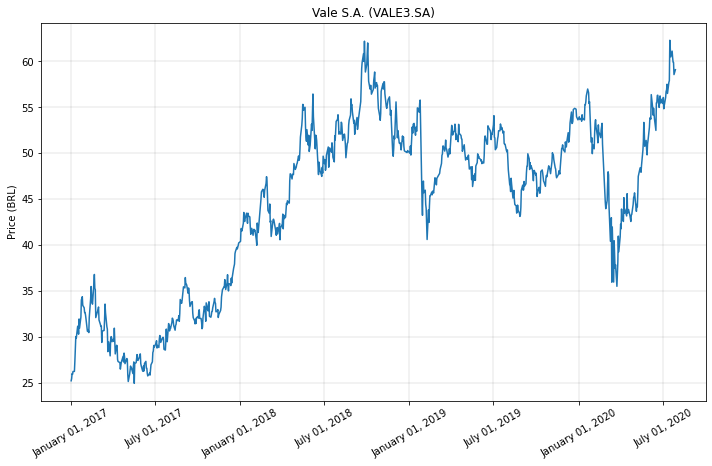

In [573]:
# Plotting Vale S.A. (VALE3.SA):

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(vale.Date, vale.Open, linestyle='-')
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.grid(linewidth=0.10)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

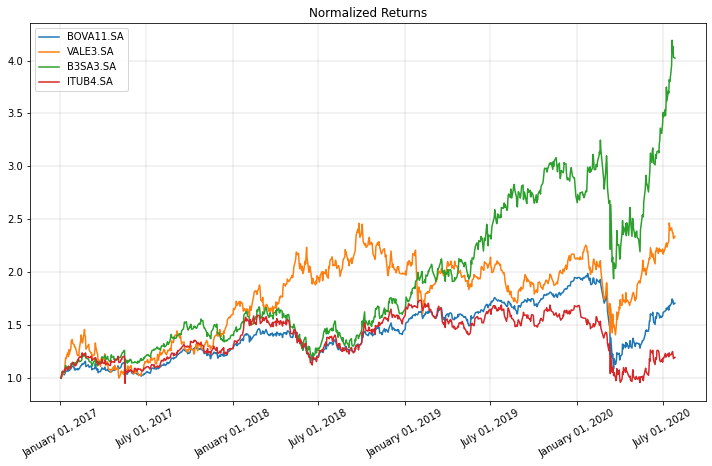

In [574]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(ibov.Date, ibov.Open/ibov.Open[0], label='BOVA11.SA', linestyle='-')
plt.plot(vale.Date, vale.Open/vale.Open[0], label='VALE3.SA', linestyle='-')
plt.plot(b3sa.Date, b3sa.Open/b3sa.Open[0], label='B3SA3.SA', linestyle='-')
plt.plot(itub.Date, itub.Open/itub.Open[0], label='ITUB4.SA', linestyle='-')

plt.title('Normalized Returns')

plt.grid(linewidth=0.10)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [575]:
# Creating DataFrame with opening prices:

my_dict_2 = {'BOVA11.SA': bova11.Open, 'VALE3.SA': vale3.Open, 
             'B3SA3.SA': b3sa3.Open, 'ITUB4.SA': itub4.Open, 'PETR4.SA': petr4.Open, 
             'BBDC4.SA': bbdc4.Open, 'PETR3.SA': petr4.Open, 'ABEV3.SA': abev3.Open, 
             'MGLU3.SA': mglu3.Open, 'BBSA3.SA': bbsa3.Open, 'ITSA4.SA': itsa4.Open}

df_main = pd.DataFrame(my_dict_2)

for key, item in df_main.items():
    r_col_name = str(key) + (' PctChange')
    returns = item.pct_change()[1:]
    df_main[r_col_name] = returns

df_main.head()

,BOVA11.SA,VALE3.SA,B3SA3.SA,ITUB4.SA,PETR4.SA,BBDC4.SA,PETR3.SA,ABEV3.SA,MGLU3.SA,BBSA3.SA,...,VALE3.SA PctChange,B3SA3.SA PctChange,ITUB4.SA PctChange,PETR4.SA PctChange,BBDC4.SA PctChange,PETR3.SA PctChange,ABEV3.SA PctChange,MGLU3.SA PctChange,BBSA3.SA PctChange,ITSA4.SA PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,57.990002,25.280001,16.260000,22.299999,14.64,18.012800,14.64,16.34,1.64109,27.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,57.650002,25.510000,16.350000,22.559999,14.95,18.156799,14.95,16.50,1.60141,27.760000,...,0.009098,0.005535,0.011659,0.021175,0.007994,0.021175,0.009792,-0.024179,-0.005018,0.006098
2017-01-04,59.740002,26.059999,16.900000,23.200001,15.45,18.620100,15.45,16.66,1.57812,28.650000,...,0.021560,0.033639,0.028369,0.033445,0.025517,0.033445,0.009697,-0.014543,0.032060,0.031515
2017-01-05,59.849998,25.980000,17.280001,23.393299,15.70,18.676399,15.70,16.52,1.50719,28.719999,...,-0.003070,0.022485,0.008332,0.016181,0.003024,0.016181,-0.008403,-0.044946,0.002443,0.015275
2017-01-06,60.480000,26.290001,17.059999,23.693300,15.78,18.883101,15.78,16.59,1.55156,28.580000,...,0.011932,-0.012732,0.012824,0.005096,0.011068,0.005096,0.004237,0.029439,-0.004875,0.006945


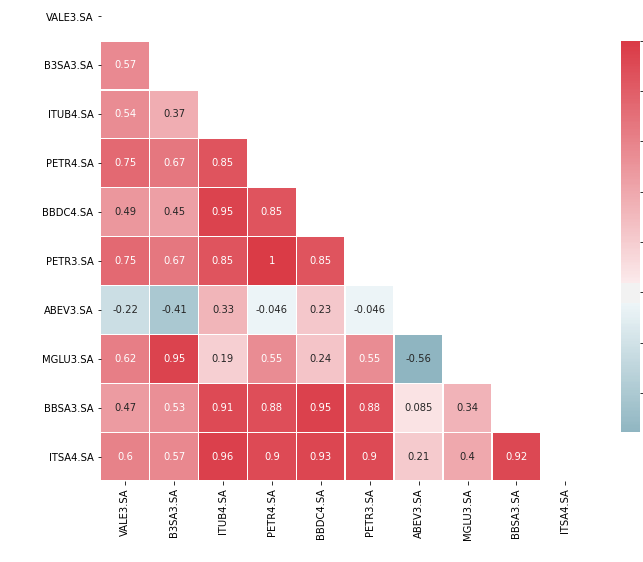

In [576]:
# Create correlation matrix: 

correl = df_main.iloc[:, 1:11].corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True )

plt.show()

In [577]:
# Daily Returns (Series)

close_ibov = ibov.Close
close_ibov_0 = ibov.Close[0]
close_ibov_norm = close_ibov/close_ibov_0

close_vale = vale.Close
close_vale_0 = vale.Close[0]
close_vale_norm = close_vale/close_vale_0

#--------------------------------------------------------------------------#

returns_ibov = ibov.Close.pct_change()[1:]
returns_vale = vale.Close.pct_change()[1:]

date_ibov_r = date_ibov[1:]
date_vale_r = date_vale[1:]

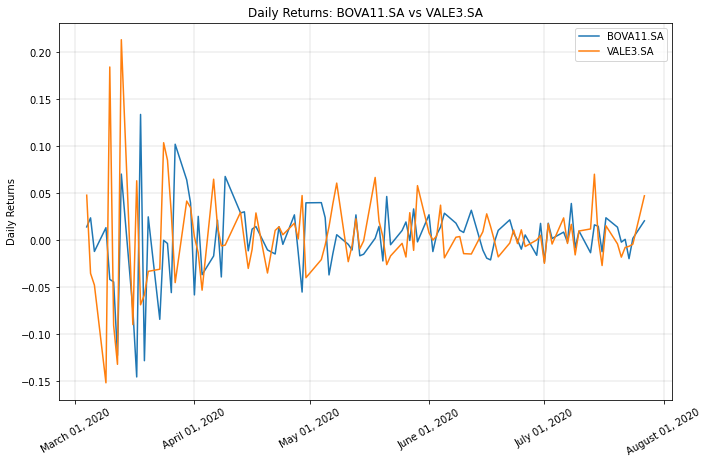

In [581]:
# BOVA11.SA vs VALE3.SA:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

n_days = 100

plt.plot(df_main.index[-n_days:], returns_ibov[-n_days:], label='BOVA11.SA', linestyle='-')
plt.plot(df_main.index[-n_days:], returns_vale[-n_days:], label='VALE3.SA', linestyle='-')

plt.title('Daily Returns: BOVA11.SA vs VALE3.SA')
plt.ylabel('Daily Returns')

plt.grid(linewidth=0.10)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

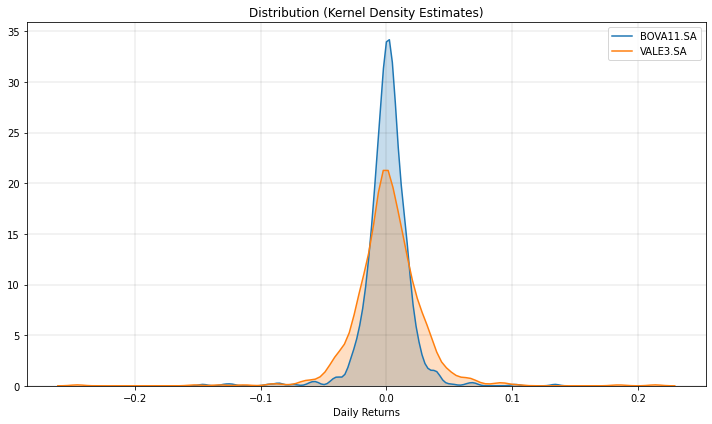

In [579]:
# Distributions:

df_ibov_vale = pd.DataFrame({'BOVA11.SA': returns_ibov,
                             'VALE3.SA': returns_vale})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_ibov_vale['BOVA11.SA'], label='BOVA11.SA' , shade=True, linestyle='-')
sns.kdeplot(data=df_ibov_vale['VALE3.SA'], label='VALE3.SA', shade=True, linestyle='-')

plt.title('Distribution (Kernel Density Estimates)')
plt.xlabel('Daily Returns')

plt.grid(linewidth=0.10)
plt.legend()
plt.tight_layout()
plt.show()

- Technical Indicator: Moving Average/Rolling Mean

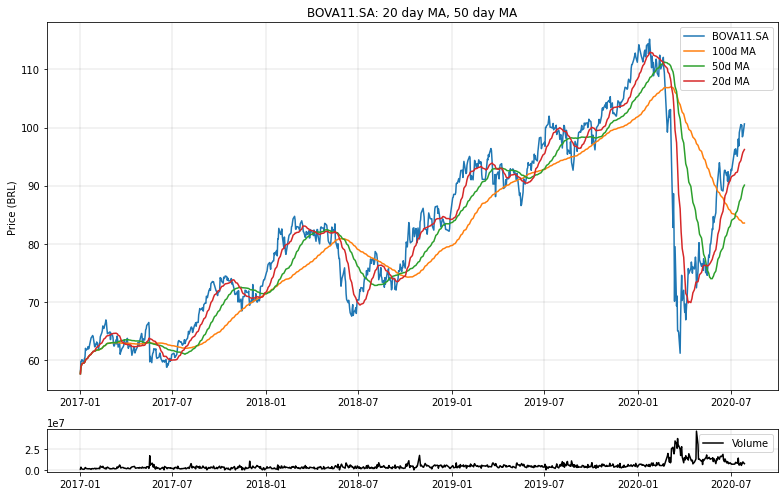

In [580]:
# Calculating 20, 50, 100 day moving average:

my_dict = { 'Date': ibov['Date'],
            'BOVA11_Volume': ibov['Volume'],
            'BOVA11_Adj_Close': ibov['Adj Close'],
            'VALE3_Adj_Close': vale['Adj Close'],
            'B3SA3_Adj_Close': b3sa['Adj Close'],
            'ITUB4_Adj_Close': itub['Adj Close']}
            
df_adj_close = pd.DataFrame(my_dict)

df_adj_close['100ma'] = df_adj_close['BOVA11_Adj_Close'].rolling(window=100, min_periods=0).mean()
df_adj_close['50ma'] = df_adj_close['BOVA11_Adj_Close'].rolling(window=50, min_periods=0).mean()
df_adj_close['20ma'] = df_adj_close['BOVA11_Adj_Close'].rolling(window=20, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df_adj_close['Date'], df_adj_close['BOVA11_Adj_Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(df_adj_close['Date'], df_adj_close['100ma'], label='100d MA', linestyle='-')
ax1.plot(df_adj_close['Date'], df_adj_close['50ma'], label='50d MA', linestyle='-')
ax1.plot(df_adj_close['Date'], df_adj_close['20ma'], label='20d MA', linestyle='-')

ax2.plot(df_adj_close['Date'], df_adj_close['BOVA11_Volume'],color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('BOVA11.SA: 20 day MA, 50 day MA')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.1)
ax2.grid(linewidth=0.1)

plt.tight_layout()
plt.show()


- Application: Machine Learning
- Can we find the best MA?
- Credits to G.Malato: ('https://github.com/gianlucamalato/machinelearning/blob/master/Find_the_best_moving_average.ipynb')